# Workstation

***Import Important Libraries***

In [2]:
!pip install GetOldTweets3
!pip install tweepy

In [3]:
# Import Tweeter APIs
import tweepy as tp
import GetOldTweets3 as got

# Import textblob to get the polarity and subjectivity of a post(Sentiment Analysis)
from textblob import TextBlob as tb

# Import datetime for date conversion
import datetime as dt

# Import libraries for data reading
import pandas as pd
import numpy as np

# Import library to create an execution timer
import threading

# Import visualizers for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Import scipy for statistical analysis
from scipy import stats

# Import the warnings
import warnings

# Import statsmodels
import statsmodels.formula.api as smf

# Import RMSE
from statsmodels.tools.eval_measures import rmse

# Import Linear Regression from scikit-learn
from sklearn.linear_model import LinearRegression

# Import train_test_split to split data
from sklearn.model_selection import train_test_split

# Pandas profiling for summary analysis of the features
import pandas_profiling as pp

%matplotlib inline
sns.set(color_codes=True)

***Scrapping Tweets***

To access the tweepy API we need authentication that will Identify who we are and what permission we hold to access the data in twitter.

In [4]:
consumer_key = "lXXXXXXXXXXXXXXXXXXXXXRX"
consumer_secret = "TyXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXmQ"
access_token = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX8cC"
access_secret = "P2X1lnsXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXJzg"

auth = tp.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tp.API(auth,wait_on_rate_limit=True)

Decided on the #bbi tweet because of its current trending which means we are able to acquire both positive and negative sentiments on it as well as we are able to acquire a large number of tweets using the GetOldTweets API.
It is quite essential to acquire as much data as possible to enable us reduce the bias that may arise in what we need to measure.

In [5]:
tweet_query = '#ikokazike'
count = 20000

Using GetOldTweets we request for as much data as indicated in our count above with the specific words we need to mine.

In [6]:
tweetCriteria = got.manager.TweetCriteria().setQuerySearch(tweet_query)\
                                            .setMaxTweets(count)
tweets = got.manager.TweetManager.getTweets(tweetCriteria)


Store the tweets scrapped from twitter into a list

In [7]:
tweets_lst = [[tw.date, tw.text, tw.username, tw.retweets, tw.favorites, tw.geo] for tw in tweets]

In [8]:
# Confirm that we received the number of tweets requested
len(tweets_lst)

3500

In [9]:
pd.DataFrame(tweets_lst)

0  \
0    2020-07-15 14:48:31+00:00   
1    2020-07-15 14:31:28+00:00   
2    2020-07-15 13:56:35+00:00   
3    2020-07-15 13:54:26+00:00   
4    2020-07-15 13:44:46+00:00   
5    2020-07-15 13:41:46+00:00   
6    2020-07-15 13:41:41+00:00   
7    2020-07-15 13:40:30+00:00   
8    2020-07-15 13:36:46+00:00   
9    2020-07-15 13:12:35+00:00   
10   2020-07-15 13:00:41+00:00   
11   2020-07-15 12:44:29+00:00   
12   2020-07-15 12:42:09+00:00   
13   2020-07-15 12:31:03+00:00   
14   2020-07-15 12:31:02+00:00   
15   2020-07-15 12:28:00+00:00   
16   2020-07-15 12:24:21+00:00   
17   2020-07-15 12:23:24+00:00   
18   2020-07-15 12:19:16+00:00   
19   2020-07-15 12:16:06+00:00   
20   2020-07-15 12:10:19+00:00   
21   2020-07-15 12:01:01+00:00   
22   2020-07-15 11:57:11+00:00   
23   2020-07-15 11:55:44+00:00   
24   2020-07-15 11:52:48+00:00   
25   2020-07-15 11:47:07+00:00   
26   2020-07-15 11:46:35+00:00   
27   2020-07-15 11:44:41+00:00   
28   2020-07-15 11:36:40+00:00   
29   2020-07-15 11:32:47+00:00   
...                        ...   
3470 2020-06-27 07:24:49+00:00   
3471 2020-06-27 07:22:06+00:00   
3472 2020-06-27 07:19:15+00:00   
3473 2020-06-27 07:19:10+00:00   
3474 2020-06-27 07:17:14+00:00   
3475 2020-06-27 07:12:58+00:00   
3476 2020-06-27 07:08:35+00:00   
3477 2020-06-27 07:05:51+00:00   
3478 2020-06-27 07:01:58+00:00   
3479 2020-06-27 06:37:39+00:00   
3480 2020-06-27 06:27:19+00:00   
3481 2020-06-27 06:18:18+00:00   
3482 2020-06-27 06:09:08+00:00   
3483 2020-06-27 06:06:40+00:00   
3484 2020-06-27 06:00:57+00:00   
3485 2020-06-27 05:52:45+00:00   
3486 2020-06-27 05:41:39+00:00   
3487 2020-06-27 05:34:33+00:00   
3488 2020-06-27 05:33:13+00:00   
3489 2020-06-27 05:23:58+00:00   
3490 2020-06-27 05:22:11+00:00   
3491 2020-06-27 05:17:52+00:00   
3492 2020-06-27 05:05:39+00:00   
3493 2020-06-27 05:03:51+00:00   
3494 2020-06-27 04:58:23+00:00   
3495 2020-06-27 03:53:38+00:00   
3496 2020-06-27 03:32:27+00:00   
3497 2020-06-27 01:32:08+00:00   
3498 2020-06-27 00:24:57+00:00   
3499 2020-06-27 00:09:33+00:00   

                                                      1                2   3  \
0                                #IkoKaziKe @johnnjenga          MMahila   0   
1                                            #IkoKaziKe       I_Am_Ednas   0   
2                                           #IkoKaziKE     danco_captain   1   
3     There are just a few days left to apply for ou...       CREAWKenya  10   
4     Hello everyone, *Work Opportunity* Distributor...     Carl47206585   2   
5     Any sign language expert who doesn't have a jo...     Ombeva_Joseh   3   
6     Hello everyone, *Work Opportunity* Distributor...     Carl47206585   2   
7     Hello everyone, *Work Opportunity* Distributor...     Carl47206585   2   
8     Keep an eye on our catalog for new arrivals & ...    _KitaleFinest   2   
9                      St Paul's University #IkoKaziKE      Analo_barron   1   
10             #IkoKaziKe ...driving school instructor          Minneh13   0   
11    A friend is selling plots opposite Mangu High ...        _Beatstep   0   
12    In the latest blog post, we provide 4 tips job...       edge_Kenya   0   
13    New post: Career Opportunity at Strathmore Uni...  CareerpointSolu   0   
14    New post: Internship Opportunity at Kenya Wild...  CareerpointSolu   1   
15                                          #IkoKaziKE         kagiridee   0   
16    If you have experience in animation please DM ...      Mwangangizz   3   
17           RT to alert someone on your TL #IkoKaziKE     DaviesKinanga   8   
18    Go for it folks. All the best. #WaihigaKMuturi...   waihigakmuturi   0   
19    We are looking for a #Policy Consultant to con...          Sanergy   1   
20    Customer Care Officer Vacancy - https://opport...     Simon_Ingari   1   
21    New post: Job Opening at Coffey https://www.ca...  CareerpointSolu   0   
22    CIC Group Is Hiring Managing Director – CIC Ge...     Simon_Ingari   2   


The function below is used to get the count of followers and friends, for the users we scrapped their tweets, using Tweepy API.

We also create a way to mitigate any errors that may be returned by the Tweepy API in case where the user can't be found. 

In [10]:
def follower_friend_miner(tweets_lst):
#     print(len(tweets_lst))
    for post in tweets_lst:
        try:
            user=api.get_user(post[2])
            post.append(user.followers_count)
            post.append(user.friends_count)
        except:
            post.append(0)
            post.append(0)
            
    return tweets_lst

Created a nested loop to go through the data scrapped with GetOldTweets and get the usernames that we are going to search for using the Tweepy API.

We have a timer that executes the query every 100 secs to prevent the Tweepy API blocking the queries. This is due to the fact that Tweepy has a limit of 180 tweets per 15 minutes for each query. To maximumly use this we needed to create a time lapse between each request to ensure that in the requests we are shy of the limit by a few tweets enabling us to query all the tweets in one single run of the code

PS:- This section takes longer with a higher number of scrapped tweets

In [11]:
tm  = 100
upper_lmt = 0
lower_lmt = 0
new_tweets_lst = []

In [12]:
if len(tweets_lst)> 100:
    for x in range(100,len(tweets_lst)+100,100):
#             print(x)
        upper_lmt = x
        timer = threading.Timer(tm, new_tweets_lst.append(follower_friend_miner(tweets_lst[lower_lmt:upper_lmt])))
#             print(tm, upper_lmt, lower_lmt)
        timer.start() 
        lower_lmt += 100
#             print(len(new_tweets_lst))
#           tm += 100
else:
    new_tweets_lst.append(follower_friend_miner(tweets_lst))

    

Exception in thread Thread-6:
Traceback (most recent call last):
  File "E:\ProgramData\Anaconda3\lib\threading.py", line 917, in _bootstrap_inner
    self.run()
  File "E:\ProgramData\Anaconda3\lib\threading.py", line 1166, in run
    self.function(*self.args, **self.kwargs)
TypeError: 'NoneType' object is not callable

Exception in thread Thread-7:
Traceback (most recent call last):
  File "E:\ProgramData\Anaconda3\lib\threading.py", line 917, in _bootstrap_inner
    self.run()
  File "E:\ProgramData\Anaconda3\lib\threading.py", line 1166, in run
    self.function(*self.args, **self.kwargs)
TypeError: 'NoneType' object is not callable

Exception in thread Thread-8:
Traceback (most recent call last):
  File "E:\ProgramData\Anaconda3\lib\threading.py", line 917, in _bootstrap_inner
    self.run()
  File "E:\ProgramData\Anaconda3\lib\threading.py", line 1166, in run
    self.function(*self.args, **self.kwargs)
TypeError: 'NoneType' object is not callable

Exception in thread Thread-9:
T

Exception in thread Thread-32:
Traceback (most recent call last):
  File "E:\ProgramData\Anaconda3\lib\threading.py", line 917, in _bootstrap_inner
    self.run()
  File "E:\ProgramData\Anaconda3\lib\threading.py", line 1166, in run
    self.function(*self.args, **self.kwargs)
TypeError: 'NoneType' object is not callable

Exception in thread Thread-33:
Traceback (most recent call last):
  File "E:\ProgramData\Anaconda3\lib\threading.py", line 917, in _bootstrap_inner
    self.run()
  File "E:\ProgramData\Anaconda3\lib\threading.py", line 1166, in run
    self.function(*self.args, **self.kwargs)
TypeError: 'NoneType' object is not callable

Exception in thread Thread-34:
Traceback (most recent call last):
  File "E:\ProgramData\Anaconda3\lib\threading.py", line 917, in _bootstrap_inner
    self.run()
  File "E:\ProgramData\Anaconda3\lib\threading.py", line 1166, in run
    self.function(*self.args, **self.kwargs)
TypeError: 'NoneType' object is not callable

Exception in thread Thread-3

In [ ]:
len(new_tweets_lst)

Since the code above returns a list of the number of lists we split our data into we need to combine the many lists to one by unwrapping the outer list

In [ ]:
tweets_lst1 = []
for x in range(0,len(new_tweets_lst)):
    print(x, len(new_tweets_lst[x]))
    tweets_lst1 += new_tweets_lst[x]
    
len(tweets_lst1)

In [ ]:
tweets_lst1[:5]

For each tweet post we have scrapped we need to find their polarity and subjectivity i.e. negatively inclined or positively inclined and speaking of a specific topic respectively.

In [ ]:
for tweet in tweets_lst:
    text_sentiment =tb(tweet[1]).sentiment
    tweet.append(text_sentiment.polarity)
    tweet.append(text_sentiment.subjectivity)

In [ ]:
tweets_lst[:6]

We convert our list of scrapped tweets to a dataframe so that we can be able to work on the data as well as manage to use it for model creation

In [ ]:
tweets_df = pd.DataFrame(tweets_lst, columns=["Date", "Post", "Username","Retweets", "Favorites", "Geo", "Followers", "Friends", "Polarity", "Subjectivity"])

In [ ]:
# Ensure our date is of datetime type
tweets_df.Date = pd.to_datetime(tweets_df.Date)

In [ ]:
tweets_df.sample(10)

In [ ]:
tweets_df.info()

We localized our date to much our current timezone

In [ ]:
tweets_df.Date = tweets_df.Date.dt.tz_localize(None)

We recquired the duration between when the tweet was posted and our current time since that difference is the one we intend to use in our modelling of the data and trying to predict the number of retweets a tweet can be able to get

In [ ]:
tweets_df["Date_diff"] = pd.Timestamp.now()- tweets_df.Date
tweets_df["Total_sec"] = [round(x.total_seconds(),2) for x in tweets_df["Date_diff"]]

In [ ]:
tweets_df.sample(10)

In [ ]:
tweets_df.info()

We dropped a few columns since we could not use them in the current model we plan to create and that some were blank

In [ ]:
tweets_df.drop(columns=["Date", "Post", "Username", "Date_diff", "Geo"], inplace=True)


Stored our mined tweets as a csv file to be used by other programs and also to avoid having to run the scrapping code every time we restart the kernel. We also have read the same file to get our data so that we can use it to create a prediction model.

In [ ]:
tweets_df.to_csv(path_or_buf="BBI_Tweets.csv")

In [5]:
tweet_stored_df = pd.read_csv("BBI_Tweets.csv")

In [6]:
tweet_stored_df.sample(10)

Unnamed: 0  Retweets  Favorites  Followers  Friends  Polarity  \
503          503         0          1        122      914 -0.125000   
626          626         0          1        735      340  0.327273   
310          310         0          0        697      724  0.000000   
269          269         0          0       5366     5339 -0.041667   
40            40         0          0       8217     6419  0.100000   
954          954         0          5      29125     2237  0.333333   
1743        1743         0          0         46      206  0.000000   
327          327         0          0         90      377  0.000000   
432          432         0          2       2463     1395  0.250000   
1476        1476         0          0          5       88 -0.083333   

      Subjectivity  Total_sec  
503       0.475000   196794.3  
626       0.615909   224746.3  
310       0.000000   135954.3  
269       0.258333   128918.3  
40        1.000000    43720.3  
954       0.466667   361224.3  
1743      0.000000  1081887.3  
327       0.000000   139759.3  
432       1.000000   164088.3  
1476      0.750000   761427.3

In [11]:
tweet_stored_df.drop(columns="Unnamed: 0", inplace=True)
tweet_stored_df.columns

Index(['Retweets', 'Favorites', 'Followers', 'Friends', 'Polarity',
       'Subjectivity', 'Total_sec'],
      dtype='object')

# Statistical Analysis and Visualization

Requested a summary analysis of our data to be able to understand the features we have and how they would affect our model accuracy.

In [12]:
pp.ProfileReport(tweet_stored_df)

In [14]:
tweet_stored_df.describe()

Retweets    Favorites     Followers       Friends     Polarity  \
count  2000.000000  2000.000000  2.000000e+03   2000.000000  2000.000000   
mean      1.609000     6.618000  3.255986e+04   2188.506500     0.041757   
std       9.266502    43.628096  2.382079e+05   4668.659286     0.243226   
min       0.000000     0.000000  0.000000e+00      0.000000    -1.000000   
25%       0.000000     0.000000  1.087500e+02    233.500000     0.000000   
50%       0.000000     1.000000  6.000000e+02    728.500000     0.000000   
75%       0.000000     2.000000  2.867500e+03   2110.250000     0.125000   
max     171.000000   837.000000  2.330080e+06  55371.000000     1.000000   

       Subjectivity     Total_sec  
count   2000.000000  2.000000e+03  
mean       0.319695  5.162553e+05  
std        0.307463  4.093703e+05  
min        0.000000  1.672930e+04  
25%        0.000000  1.882475e+05  
50%        0.300000  4.045108e+05  
75%        0.540000  7.761893e+05  
max        1.000000  1.522271e+06

In [15]:
tweet_stored_df.mode()# Get the mode value of each column

Retweets  Favorites  Followers  Friends  Polarity  Subjectivity  Total_sec
0       0.0        0.0          2    251.0       0.0           0.0   155552.3
1       NaN        NaN          7      NaN       NaN           NaN   406634.3

In [16]:
tweet_stored_df.skew() #Get the skewness of each column 

Retweets        11.752725
Favorites       12.996808
Followers        9.176502
Friends          5.211113
Polarity        -0.122935
Subjectivity     0.508424
Total_sec        0.868800
dtype: float64

In [17]:
tweet_stored_df.kurtosis()#Get the kurtosis of each column to understand the type of curve each column will be plotting

Retweets        166.653947
Favorites       192.127400
Followers        84.322162
Friends          34.220048
Polarity          3.475320
Subjectivity     -0.854422
Total_sec        -0.329913
dtype: float64

***Visualization of the data***

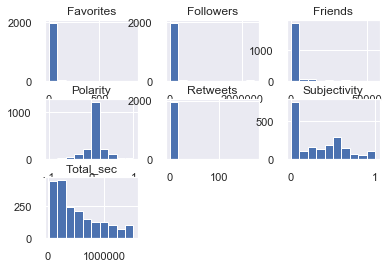

In [19]:
# create an histogram for each column to understand the spread
tweet_stored_df.hist()
plt.show()

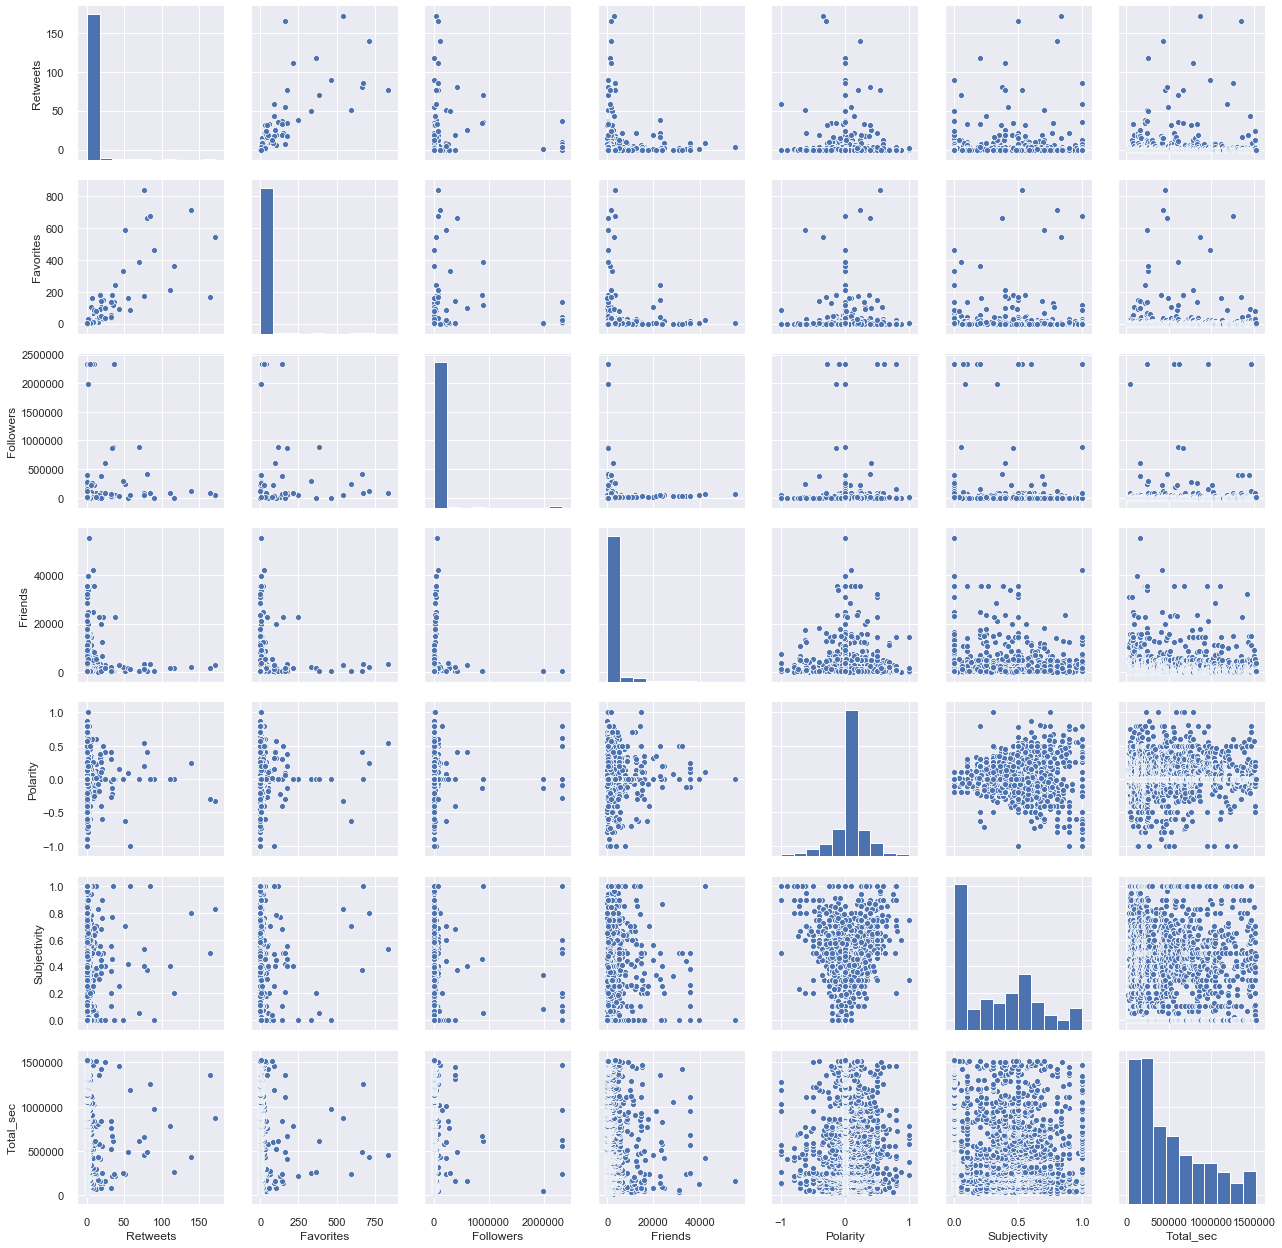

In [29]:
sns.pairplot(data=tweet_stored_df)

In [31]:
data_df = tweet_stored_df[tweet_stored_df["Total_sec"]>=432000]
data_df.sample(10)

Retweets  Favorites  Followers  Friends  Polarity  Subjectivity  \
1329        35        119     892665      203  0.000000      1.000000   
1148         0          1        550      784  0.000000      0.000000   
1612         0          0       1045     1150  0.000000      0.183333   
1223         0          0       5008      597  0.000000      0.000000   
1458         0          0         45      317 -0.191071      0.469643   
1360         0          0        165     1242  0.500000      0.462500   
1265         9         15      33212    35791  0.000000      0.000000   
1725         0          3       1128      932  0.200000      0.462500   
1758         0          0       1273     1836  0.000000      0.000000   
1429         0          2        484     1079  0.433333      0.833333   

      Total_sec  
1329   610911.3  
1148   471053.3  
1612   921163.3  
1223   521092.3  
1458   747176.3  
1360   656436.3  
1265   562207.3  
1725  1043578.3  
1758  1095906.3  
1429   728007.3

***Null Hypothesis:*** The Retweets for tweets posted more than 5 days ago is greater than 10

$H$<sub>$0$</sub> : $\mu > 10$

***Alternative Hypothesis:*** The Retweets for tweets posted more than 5 days ago is less than or equal to 10

$H$<sub>$1$</sub> : $\mu \le 10$

Conduct a T-test to get the T-test value and P_value

In [35]:
ttest,p_value = stats.ttest_1samp(a=data_df.Retweets,popmean= 10)

In [36]:
ttest

-18.47861969644104

Since our P_value is less than our critical value of 0.05, we ***reject the null value***

In [37]:
p_value

5.6532726567197875e-65

Split our data into test and train data

In [48]:
X_train, X_test, y_train, y_test = train_test_split(tweet_stored_df[["Favorites" , "Followers" , "Friends" , "Polarity" , "Subjectivity" , "Total_sec"]], tweet_stored_df.Retweets, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1600, 6) (400, 6) (1600,) (400,)


Use statsmodel OLS function to create a model that we can get a summary of each feature and the trainning outcome. this will help in feature selection for the model we are to use

In [40]:
stats_model = smf.ols("Retweets ~ Favorites + Followers + Friends + Polarity + Subjectivity + Total_sec",data=tweet_stored_df)
stats_model = stats_model.fit()

In [41]:
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Retweets   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     709.8
Date:                Wed, 26 Feb 2020   Prob (F-statistic):               0.00
Time:                        06:15:44   Log-Likelihood:                -6146.9
No. Observations:                2000   AIC:                         1.231e+04
Df Residuals:                    1993   BIC:                         1.235e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1752      0.236     -0.741      0.459      -0.639       0.289
Favorites        0.1741      0.003     64.186      0.000       0.169       0.179
Followers     5.986e-07   4.96e-07      1.207      0.228   -3.74e-07    1.57e-06
Friends       3.547e-05   2.51e-05      1.412      0.158   -1.38e-05    8.48e-05
Polarity        -1.4186      0.485     -2.928      0.003      -2.369      -0.468
Subjectivity     0.5507      0.384      1.435      0.152      -0.202       1.304
Total_sec       8.1e-07   2.87e-07      2.821      0.005    2.47e-07    1.37e-06
==============================================================================
Omnibus:                     3392.592   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7043411.067
Skew:                          10.845   Prob(JB):                         0.00
Kurtosis:                     292.915   Cond. No.                     2.75e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Create a linear Regression model to train on and predict our training and test data

In [49]:
LR_model = LinearRegression()
tweet_model = LR_model.fit(X_train, y_train)

In [50]:
tweet_ypred = tweet_model.predict(X_test)

In [51]:
tweet_rmse = rmse(y_test, tweet_ypred)
tweet_rmse

3.0798077327054045